In [14]:
import pandas as pd
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

In [4]:
df

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A
5,99,A
6,97,A
7,96,A
8,98,A
9,106,A


In [9]:
genitem = []
for i in 'ABCD':
    genitem += [df[df["Therapy"] == i]["expr"]]

In [18]:
stats.f_oneway(*genitem)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [19]:
from scipy.stats import t
import matplotlib.pyplot as plt

In [21]:
p = 0.95
data_agg = df.groupby(['Therapy']).agg(['count','mean','std'])

In [30]:
data_agg = data_agg.droplevel(0, axis=1)

In [31]:
data_agg.rename(columns = {'count': 'N', 'mean': 'Mean', 'std': 'Std'}, inplace=True)

In [32]:
data_agg['se'] = data_agg.Std.div(data_agg.N ** 0.5)

In [34]:
data_agg['K'] = data_agg.apply(\
    lambda x: t.interval(p, x.N-1, loc=x.Mean, scale=x.se)[1],axis=1) - data_agg.Mean

In [35]:
data_agg.

Therapy
A    2.306843
B    3.264159
C    2.876010
D    2.068534
Name: K, dtype: float64

C:\Users\al\AppData\Local\Temp\ipykernel_15732\3465085384.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x='Therapy ' + data_agg.index, y=data_agg.Mean, yerr=data_agg.K,


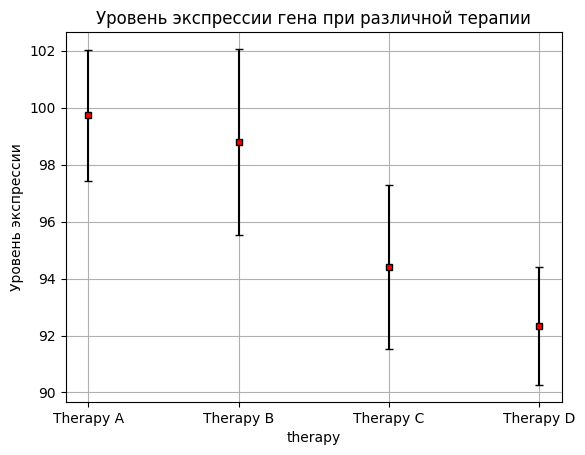

In [36]:
plt.errorbar(x='Therapy ' + data_agg.index, y=data_agg.Mean, yerr=data_agg.K,
             color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('therapy')
plt.ylabel('Уровень экспрессии')
plt.show()

In [37]:
from scipy import stats
import itertools
import math
import pandas as pd
import numpy as np
from scipy.stats import studentized_range

URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)

def ssdev( xs ):
    mu = xs.mean()
    square_deviation = lambda x : (x - mu) ** 2
    return sum( map(square_deviation, xs) )


SSW = sum(data.groupby('Therapy').apply(lambda g: ssdev(np.array(g))))
# Out: 1302.2666666666669

dfSSW = len(data.expr) - len(data.Therapy.unique()) # Out: 56
MSw = SSW/dfSSW # Out: 186.90555556
SE = math.sqrt(MSw/15) #Out: 1.2451174509525864

combinations = list(itertools.combinations(data.Therapy.unique(), 2))
#Out: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

n_group = len(data.Therapy.unique()) #Out: 4
dfSSW = len(data.expr) - len(data.Therapy.unique()) #Out:56


alpha = 0.05
q_crit = studentized_range.ppf(1-alpha, n_group, dfSSW) # Out: 3.7446781868177195

df = pd.DataFrame(columns=[f'{first} - {second}' for first, second in combinations],
                  index=['q','meandiff','p-adj','lower','upper'])

means = data.groupby('Therapy').mean().T

for first, second in combinations:
    key = f'{first} - {second}'
    first_second_mean = [means[first].expr, means[second].expr]
    _q = (max(first_second_mean) - min(first_second_mean))/SE
    _meandiff = (means[second].expr - means[first].expr)
    df[key]['q'] = _q
    df[key]['meandiff'] = _meandiff
    df[key]['p-adj'] = 1-studentized_range.cdf(_q, n_group, dfSSW)
    df[key]['upper'] = _meandiff+ q_crit*SE
    df[key]['lower'] = _meandiff- q_crit*SE

df.T

,q,meandiff,p-adj,lower,upper
A - B,0.749595,-0.933333,0.95142,-5.595897,3.729231
A - C,4.283398,-5.333333,0.018886,-9.995897,-0.670769
A - D,5.943214,-7.4,0.000542,-12.062564,-2.737436
B - C,3.533803,-4.4,0.071041,-9.062564,0.262564
B - D,5.19362,-6.466667,0.002944,-11.129231,-1.804103
C - D,1.659817,-2.066667,0.645794,-6.729231,2.595897


In [47]:
df = pd.read_clipboard(sep=' ')

In [48]:
df

,X,Y
0,4,2
1,5,1
2,2,4
3,3,3
4,1,5


<AxesSubplot:xlabel='X', ylabel='Y'>

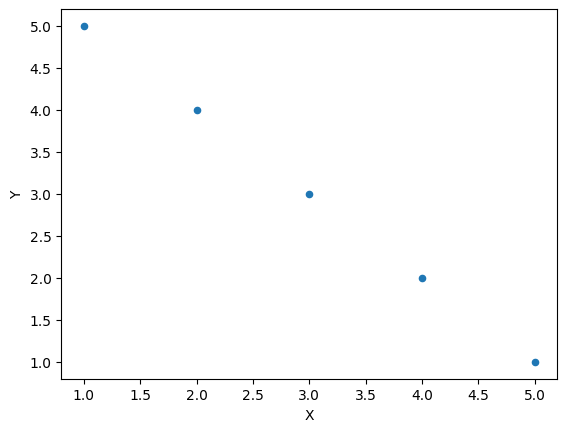

In [49]:
df.plot.scatter(x='X',y='Y')